# Milky Way CCSN Distributions

Load FITS data containing the probability of finding a core-collapse supernova (CCSN) at some radial distance from the Sun. The data come from a variety of papers with more or less "realistic" information about the structure of the Milky Way. Since the structure and distribution of CCSN are uncertain these models can be taken to represent the systematic uncertainties in the expected distribution of Galactic CCSNe.

Sources for the models include:

1. J. Bahcall and T. Piran, ApJL 267:L77, 1983.
1. A. Mirizzi, G. Raffelt, P. Serpico, JCAP 0605:012, 2006 (two parameterizations).
1. M. Ahlers, P. Mertsch, S. Sarkar, PRD 80:123017, 2009.
1. S. Adams, C. Kochanek, J. Beacom, M. Vagins, K. Stanek, ApJ 778:164, 2013.

The data are stored as cumulative distributions, making it easy to randomly generate distances with respect to the solar system according to their respective probability density functions. Examples are shown below.

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy import units as u
from scipy.interpolate import PchipInterpolator

from asteria.stellardist import FixedDistance, StellarDensity

In [2]:
grid_style =   {     'alpha' : '0.75',
                 'linestyle' : ':' }
legend_style = {  'fontsize' : '12' }
font_syle =    {      'size' : '14' }

mpl.rc(  'font', **font_syle)
mpl.rc(  'grid', **grid_style)
mpl.rc('legend', **legend_style)

## Test FixedDistance Model

The `FixedDistance` class will create a progenitor at a fixed location $d$. By default, $d$ has no uncertainty. It is also possible to introduce a distance uncertainty $\sigma$; sampling from `FixedDistance` in this case will produce a Gaussian distribution in $d$.

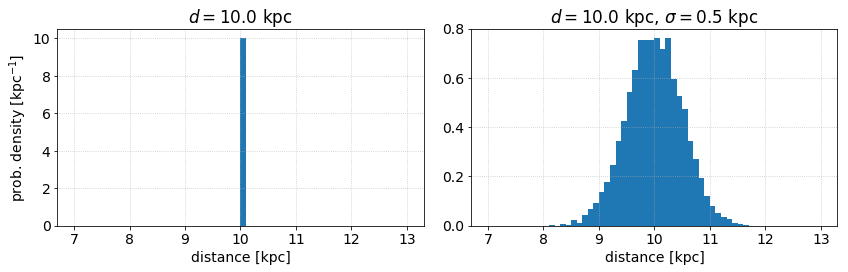

In [3]:
fd1 = FixedDistance(10*u.kpc)
d1 = fd1.distance(10000)

fd2 = FixedDistance(10*u.kpc, sigma=0.5*u.kpc)
d2 = fd2.distance(10000)

fig, axes = plt.subplots(1,2, figsize=(12,4), sharex=True)
ax1, ax2 = axes

bins = np.linspace(7, 13, 61)
ax1.hist(d1.value, bins, normed=True)
ax1.set(ylabel='prob. density [kpc$^{-1}$]',
        xlabel='distance [kpc]',
        title='$d=${}'.format(fd1.dist))
ax1.grid(ls=':')
ax2.hist(d2.value, bins, normed=True)
ax2.set(xlabel='distance [kpc]',
        title='$d=${}, $\sigma=${}'.format(fd2.dist, fd2.sigma))
ax2.grid(ls=':')
fig.tight_layout()

## Test Radial Stellar Mass Distribution Models

The `StellarDensity` model is based on estimates of the radial distribution of matter (dominated by the Milky Way) with respect to the Sun.

### Plot Cumulative Stellar Mass Distributions

Internally, `StellarDensity` stores the cumulative distribution as a function of radial distance from the solar system.

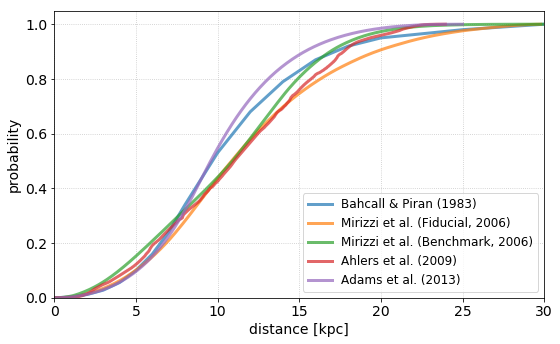

In [4]:
models = ['bahcall', 'mirizzi_fid', 'mirizzi_ben', 'ahlers', 'adams']

fig, ax = plt.subplots(1,1, figsize=(8,5))

for model in models:
    sd = StellarDensity('../../data/stellar/sn_radial_distrib_{}.fits'.format(model))
    ax.plot(sd.dist, sd.cdf, lw=3, alpha=0.7, label=sd.name)

ax.set(xlabel='distance [kpc]',
       xlim=(0,30),
       ylabel='probability',
       ylim=(0,1.05))
ax.grid(ls=':')
ax.legend(fontsize=12)
fig.tight_layout();

### Generate Radial Distances

Randomly sample radial distances using several available stellar distribution models.

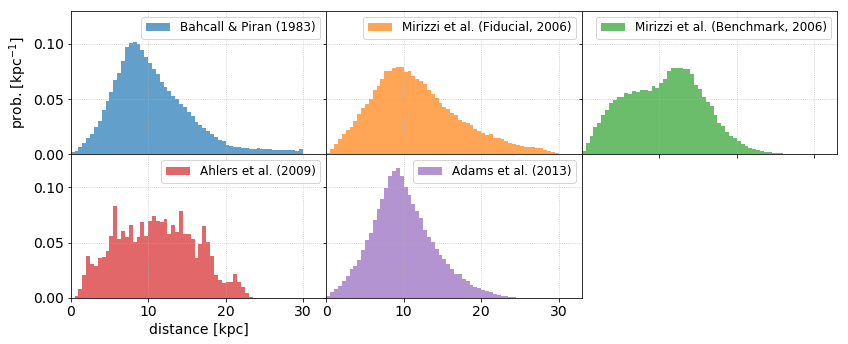

In [5]:
models = ['bahcall', 'mirizzi_fid', 'mirizzi_ben', 'ahlers', 'adams']

fig, axes = plt.subplots(2,3, figsize=(12,5), sharex=True, sharey=True)
axes = axes.flatten()
axes[5].axis('off')

for i, (model, ax) in enumerate(zip(models, axes)):
    sd = StellarDensity('../../data/stellar/sn_radial_distrib_{}.fits'.format(model))
    distances = sd.distance(100000)
    
    ax.hist(distances.value, bins=np.linspace(0,30,61), color='C{}'.format(i),
            alpha=0.7,
            label=sd.name,
            normed=True)
    ax.legend()
    ax.grid()

axes[0].set(ylim=(0,0.13),
            ylabel='prob. [kpc$^{-1}$]')
axes[3].set(xlim=(0,33),
            xlabel='distance [kpc]')
fig.tight_layout()
fig.subplots_adjust(hspace=0, wspace=0)